In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

data processing

In [4]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail.value_counts('Country')

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [6]:
retail.value_counts('InvoiceNo')

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C581100       1
C581323       1
C581162       1
536380        1
536374        1
Name: count, Length: 25900, dtype: int64

In [7]:
retail.value_counts('CustomerID')

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
12943.0       1
18184.0       1
18174.0       1
18233.0       1
13135.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
print('Number of missing values: ', retail.isnull().values.sum())
print('Percent of missing values per feature: ') 
retail.isnull().sum() * 100 / len(retail)

Number of missing values:  136534
Percent of missing values per feature: 


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
retail.dropna(inplace=True)

In [12]:
retail.reset_index(drop=True, inplace=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
print('Number of missing values: ', retail.isnull().values.sum())
print('Data lenght: ', len(retail))

Number of missing values:  0
Data lenght:  406829


In [14]:
duplicates_retail = retail.duplicated()
print(duplicates_retail.sum())

5225


In [15]:
duplicated_row1 = retail[duplicates_retail == True].iloc[0]
print(duplicated_row1)

InvoiceNo                           536409
StockCode                            21866
Description    UNION JACK FLAG LUGGAGE TAG
Quantity                                 1
InvoiceDate            2010-12-01 11:45:00
UnitPrice                             1.25
CustomerID                         17908.0
Country                     United Kingdom
Name: 517, dtype: object


In [16]:
duplicated_row2 = retail[duplicates_retail == True].iloc[1]
print(duplicated_row2)

InvoiceNo                             536409
StockCode                              22866
Description    HAND WARMER SCOTTY DOG DESIGN
Quantity                                   1
InvoiceDate              2010-12-01 11:45:00
UnitPrice                                2.1
CustomerID                           17908.0
Country                       United Kingdom
Name: 527, dtype: object


In [17]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [18]:
count_manual = (retail['Description'].eq('Manual')).sum()
count_disc = (retail['Description'].eq('Discount')).sum()
count_post = (retail['Description'].eq('POSTAGE')).sum()
count_cruk = (retail['Description'].eq('CRUK Commission')).sum()
count_dot = (retail['Description'].eq('DOTCOM POSTAGE')).sum()

print('Sum of value manual: ', count_manual)
print('Sum of value discount: ', count_disc)
print('Sum of value postage: ', count_post)
print('Sum of value cruk commission: ', count_cruk)
print('Sum of value dotcom postage: ', count_dot)

Sum of value manual:  465
Sum of value discount:  77
Sum of value postage:  1196
Sum of value cruk commission:  16
Sum of value dotcom postage:  16


In [19]:
code_less_5_filter = retail['StockCode'].str.len() < 5
code_less_5 = retail[code_less_5_filter]
count_stockcode_less_5 = code_less_5.shape[0]

print("Count of values with length less than 5 in StockCode: {}".format(count_stockcode_less_5))

Count of values with length less than 5 in StockCode: 1908


In [20]:
code_less_5.value_counts('StockCode')

StockCode
POST    1196
M        465
C2       134
D         77
CRUK      16
DOT       16
PADS       4
Name: count, dtype: int64

In [ ]:
unwanted_stockcodes = ['POST', 'M', 'C2', 'D', 'CRUK', 'DOT', 'PADS']
mask = ~retail['StockCode'].isin(unwanted_stockcodes)

retail = retail[mask]

In [22]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,404921.000000,404921,404921.000000,404921.000000
mean,12.105470,2011-07-10 16:57:49.616344832,2.901451,15295.158048
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13969.000000
50%,5.000000,2011-07-31 12:02:00,1.950000,15159.000000
75%,12.000000,2011-10-20 13:07:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,249.233858,NaN,4.431232,1710.414161


In [23]:
count_manual = (retail['Description'].eq('Manual')).sum()
count_disc = (retail['Description'].eq('Discount')).sum()
count_post = (retail['Description'].eq('POSTAGE')).sum()
count_cruk = (retail['Description'].eq('CRUK Commission')).sum()
count_dot = (retail['Description'].eq('DOTCOM POSTAGE')).sum()

print('Sum of value manual: ', count_manual)
print('Sum of value discount: ', count_disc)
print('Sum of value postage: ', count_post)
print('Sum of value cruk commission: ', count_cruk)
print('Sum of value dotcom postage: ', count_dot)

Sum of value manual:  0
Sum of value discount:  0
Sum of value postage:  0
Sum of value cruk commission:  0
Sum of value dotcom postage:  0


In [24]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

## RFM
RFM is a method used for analyzing customer value and segmenting customers which is commonly used in database marketing and direct marketing. It has received particular attention in the retail and professional services industries.

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?
Frequency – How often do they purchase?
Monetary Value – How much do they spend?

In [ ]:
reference_date = retail['InvoiceDate'].max()
grouped = retail.groupby('CustomerID')['InvoiceDate'].max().reset_index()
grouped['Recency'] = (reference_date - grouped['InvoiceDate']).dt.days
retail = retail.merge(grouped[['CustomerID', 'Recency']], on='CustomerID', how='left')

In [ ]:
frequency = retail.groupby('CustomerID')['InvoiceNo'].count()
retail = retail.merge(frequency, on='CustomerID', how='left')
retail.rename(columns={'InvoiceNo_x':'InvoiceNo', 'InvoiceNo_y':'Frequency'}, inplace=True)

In [ ]:
monetary_value = retail.groupby('CustomerID')['UnitPrice'].sum()
retail = retail.merge(monetary_value, on='CustomerID', how='left')
retail.rename(columns={'UnitPrice_x':'UnitPrice', 'UnitPrice_y':'MonetaryValue'}, inplace=True)

In [ ]:
r_quartile = pd.qcut(retail['Recency'], 4, labels=[4, 3, 2, 1])
f_quartile = pd.qcut(retail['Frequency'], 4, labels=[1, 2, 3, 4])
m_quartile = pd.qcut(retail['MonetaryValue'], 4, labels=[1, 2, 3, 4])
retail['RFM_Score'] = r_quartile.astype(int) + f_quartile.astype(int) + m_quartile.astype(int)

In [ ]:
def assign_rfm_level(row):
    if row['RFM_Score'] >= 10:
        return 'Best Customers'
    elif (row['RFM_Score'] < 10) and (row['RFM_Score'] >= 6):
        return 'Loyal Customers'
    elif (row['RFM_Score'] < 6) and (row['RFM_Score'] >= 4):
        return 'Potential Loyalists'
    elif (row['RFM_Score'] < 4) and (row['RFM_Score'] >= 2):
        return 'Promising'
    else:
        return 'Needs Attention'

retail['RFM_Level'] = retail.apply(assign_rfm_level, axis=1)

In [30]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers


C:\Users\abolf\AppData\Local\Temp\ipykernel_11992\3848652843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = retail, x = 'RFM_Level', palette = 'Set1')


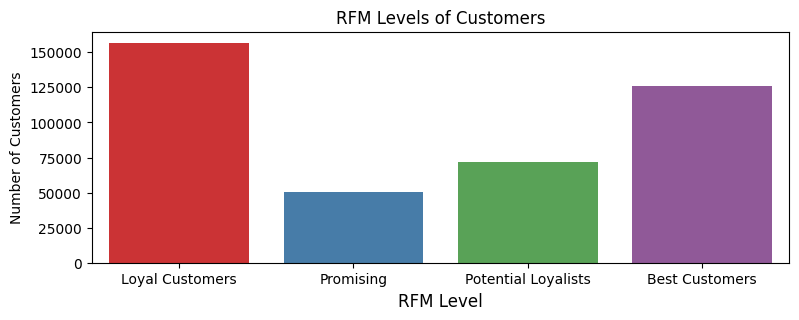

In [ ]:
plt.figure(figsize=(9,3))
sns.countplot(data = retail, x = 'RFM_Level', palette = 'Set1')
plt.xlabel('RFM Level', fontsize = 12)
plt.ylabel('Number of Customers')
plt.title('RFM Levels of Customers')
plt.show()

In [ ]:
segmented_customers = retail.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
})
segmented_customers

Recency    Frequency MonetaryValue        
                           mean         mean          mean   count
RFM_Level                                                         
Best Customers         4.432232  1815.432773   5244.151497  125627
Loyal Customers       23.216174   223.244631    614.814420  156832
Potential Loyalists   58.865942    87.589062    245.280141   71894
Promising            146.128263    41.723620    115.478936   50568

<Axes: xlabel='None-None', ylabel='RFM_Level'>

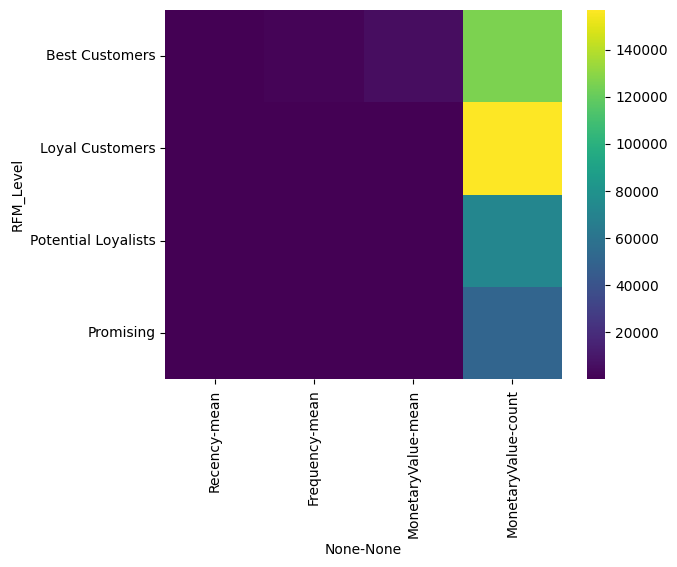

In [33]:
sns.heatmap(segmented_customers, cmap = 'viridis')

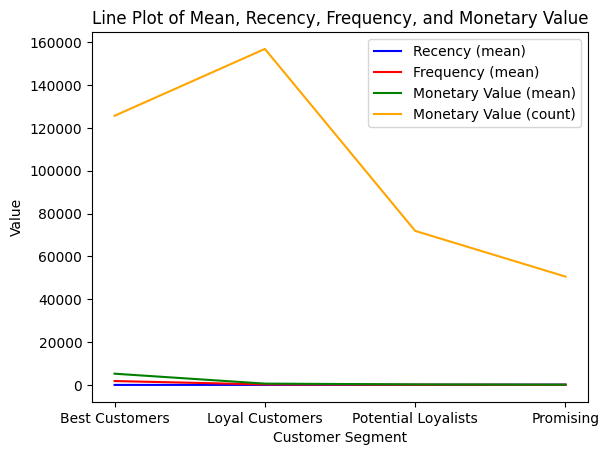

In [ ]:
recency_mean = segmented_customers.loc[:, ('Recency', 'mean')]
frequency_mean = segmented_customers.loc[:, ('Frequency', 'mean')]
monetary_value_mean = segmented_customers.loc[:, ('MonetaryValue', 'mean')]
monetary_value_count = segmented_customers.loc[:, ('MonetaryValue', 'count')]

plt.plot(recency_mean, c = 'blue', label = 'Recency (mean)')
plt.plot(frequency_mean, c = 'red', label = 'Frequency (mean)')
plt.plot(monetary_value_mean, c = 'green', label = 'Monetary Value (mean)')
plt.plot(monetary_value_count, c = 'orange', label = 'Monetary Value (count)')
plt.xlabel('Customer Segment')
plt.ylabel('Value')
plt.title('Line Plot of Mean, Recency, Frequency, and Monetary Value')
plt.legend()
plt.show()